## Tugas Akhir Data Mining 
## "Mengklasifikasi Data Penipuan Transaksi Menggunakan Kartu Kredit Dengan Metode Naive Bayes, K-NN,  dan Desision Tree"

## Perkenalan

Nama : Syaiful Rizal Sidiq

NIM : A11.2021.13849

Kelas : A11.4404

## Abstraksi

Penipuan dalam transaksi kartu kredit merupakan masalah serius yang perlu ditangani. Masyarakat yang semakin banyak menggunakan kartu kredit membuat tingkat penipuan transaksi kartu kredit semakin meningkat. Experimen ini  menggunakan credit  card  fraud  dataset yang berasal dari salah satu instansi, terdiri  dari 999.999 ribu  data  yang  didapatkan  dari  Kaggle. 

Melihat itu tujuan utama dari dataset ini adalah unutk mengklasifikasikan apakah akan terjadi penipuan terhadap suatu transaksi menggunakan kartu credit berikutnya berdasarkan data transaksi kartu kredit sebelumnya. Untuk variabel targetny adlah fraud atau "penipuan" yang menunujukkan apakah akan transaksi tersbut penipuan atau tidak. selain itu dataset ini juga berisi beberapa variabel input seperti Jarak dari rumah ke lokasi transaksi, Jarak dari transaksi terakhir yang terjadi, Rasio antara harga pembelian dengan harga pembelian median, Apakah transaksi dilakukan oleh retailer yang sama, Apakah transaksi dilakukan melalui chip pada kartu kredit, Apakah transaksi dilakukan dengan menggunakan nomor PIN, dan Apakah transaksi dilakukan secara online.


beberapa eksperimen untuk analasis dan klasifikasi yang dapat dilakukan dengan dataset credit  card  fraud adalah :

    1. Klasifikasi apakah transaksi akan terindentifikasi transaksi penipuan atau tidak
    2. 

Dataset credit  card  fraud penting karena dapat membantu dalam mengklasifikasi tranasaksi kartu credit kedepannya dan membantu perusahaan penerbit kartu kredit dapat membangun model klasifikasi yang akurat, sehingga harapanya dapat melawan penipuan, melindungi pemegang kartu, dan meminimalkan kerugian finansial. 


## Objektif
Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

● Mampu memahami konsep Classification dengan Naive Bayes, K-NN, dan Decision Tree

● Mampu mempersiapkan data untuk digunakan dalam model Naive Bayes, K-NN, dan Decision Tree

● Mampu mengimplementasikan Naive Bayes, K-NN, dan Decision Tree untuk membuat prediksi


## Import Library 

In [1]:
#untuk dataframe
import pandas as pd

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Loading
### Memanggil Data set

In [2]:
# Import dan Membaca dataset
df = pd.read_csv("card_transdata.csv")  

#Menampilkan dataset 5 teratas
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Melihat ukuran data(baris, kolom)

In [3]:
df.shape

(1000000, 8)

## Pengecekan Nama Kolom

In [4]:
df.columns.values

array(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'], dtype=object)

## Penjelasan Tiap kolom

1. distance_from_home: Jarak dari rumah ke lokasi transaksi.
2. distance_from_last_transaction: Jarak dari transaksi terakhir yang terjadi.
3. ratio_to_median_purchase_price: Rasio antara harga pembelian dengan harga pembelian median.
4. repeat_retailer: Apakah transaksi dilakukan oleh retailer yang sama.
5. used_chip: Apakah transaksi dilakukan melalui chip pada kartu kredit.
6. used_pin_number: Apakah transaksi dilakukan dengan menggunakan nomor PIN.
7. online_order: Apakah transaksi dilakukan secara online.
8. fraud: Apakah transaksi tersebut merupakan penipuan.

## Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Deskriptif Statistik

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Pengecekan Data yang duplikat untuk semua kolom

In [7]:
df.duplicated().sum()

0

## Mengecek apakah ada atribut yang missing value

Proses mengecek data pada setiap atribut yang memiliki missing value kemudian menjumlahkannya

In [8]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Dari pengecekan diatas tidak terdapat atribut yang memiliki missing value, maka proses pembersihan data selesai

setelah dilakukakan filerisasi pada label terdapat  912.597 data yang tidak terkenan penipuan dan 87.403 data yang terkena penipuan.

karena datanya tidak seimbang antara yang terkena penipuan dan yang tidak terkenan penipuan maka dilakukan undersampling mengatasi masalah bias yang mungkin timbul akibat perbedaan jumlah sampel dalam setiap kelas. Undersampling melibatkan pengurangan sampel dari kelas mayoritas sehingga jumlah sampel dalam setiap kelas menjadi lebih seimbang. Ini dapat dilakukan dengan cara menghapus sebagian sampel dari kelas mayoritas.

## Normalisasi Dataset

Dikarenakan tidak terdapt missing value, maka dilanjutkan ke prosessing berikutnya


## Explorasi data Analist
### Target : Fraud

Sekarang kita akan melihat nilai NO (tidak penipuan) dan YES (penipuan) pada kolom fraud menggunakan BarChart

0.0    912597
1.0     87403
Name: fraud, dtype: int64


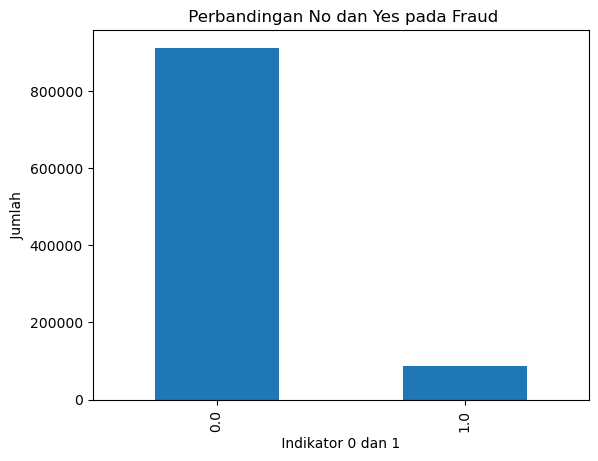

In [9]:
df["fraud"].value_counts().plot(kind="bar")
plt.title(" Perbandingan No dan Yes pada Fraud")
plt.xlabel(" Indikator 0 dan 1 ")
plt.ylabel(" Jumlah ")
print(df["fraud"].value_counts())

## Keterangan

BarChart diatas menunjukan hasil perbandingan nilai No dan Yes pada kolom Fraud

## Kesimpulan dari analisis Target RainTomorrow
Kesimpulan

Hasil dari BarChart diatas menunjukkan, Hasil "NO" ada pada angka 912.597 dan "YES" ada pada angka 87.403. Dari hasil BarChart diatas menunjukan bahwa jumlah hasil prediksi "NO" menghasilkan angka yang sangat tinggi sekali. Hasil ini membuktikan bahwa hasil nilai"NO" lebih mendominasi dari pada nilai "YES" dan jumlah selisihnya sangat jauh. Hasil Dari "YES" dan "NO" ini harus dilakukan balancing data. Jikalau tidak dilakukan Balancing data, Model akan cenderung memprediksi kelas mayoritas karena data mayoritas memiliki lebih banyak sampel daripada data minoritas.

## PreProcesing Data

### Balancing Data
Dikarenakan Jumlah pada Target "NO" Sangatlah tinggi. Sekarang kita akan lakukan UnderSampling pada data yang ada.

In [10]:
countRT = df["fraud"].value_counts()
countRT

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [11]:
n = min(countRT)
n

87403

In [12]:
subset_yes = df[df['fraud'] == 1].sample(n=87403, random_state=42)
subset_no = df[df['fraud'] == 0].sample(n=87403, random_state=42)

In [13]:
new_df = pd.concat([subset_yes, subset_no])

In [14]:
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
909977,25.920200,10.792762,9.541436,1.0,0.0,0.0,1.0,1.0
649305,129.610251,1.132247,0.802504,1.0,0.0,0.0,1.0,1.0
364031,117.420499,4.914930,0.321369,1.0,0.0,0.0,1.0,1.0
161491,176.667414,1.229757,3.845739,1.0,0.0,0.0,1.0,1.0
65707,26.138134,0.875708,9.752672,1.0,0.0,0.0,1.0,1.0


In [15]:
new_df["fraud"].value_counts()

1.0    87403
0.0    87403
Name: fraud, dtype: int64

1.0    87403
0.0    87403
Name: fraud, dtype: int64


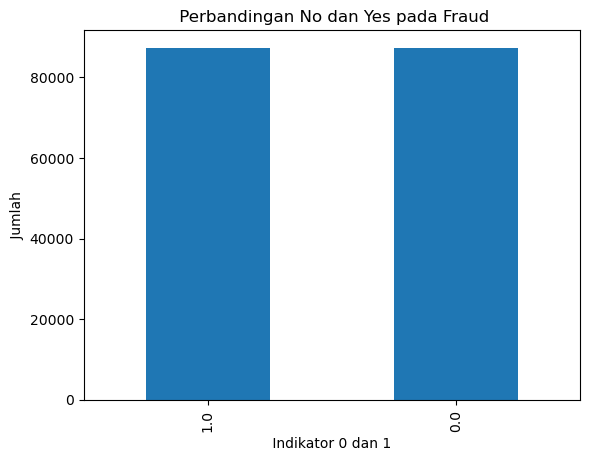

In [16]:
new_df["fraud"].value_counts().plot(kind="bar")
plt.title(" Perbandingan No dan Yes pada Fraud")
plt.xlabel(" Indikator 0 dan 1 ")
plt.ylabel(" Jumlah ")
print(new_df["fraud"].value_counts())

In [17]:
new_df.shape

(174806, 8)

Proses Undersampling sudah selesai, jumlah data menjadi balance.

## Pendefinisian Model

In [18]:
mode_NB = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_logreg = LogisticRegression()

## Memisahkan fitur dan label

Dalam proses pemisahan fitur dan label tujuannya adalah untuk mengidentifikasi atribut-atribut yang relevan dan signifikan dalam mempengaruhi nilai target.

In [19]:
X = new_df.drop("fraud", axis=1)
y = new_df["fraud"]

## Pelatihan Model

## Mengklasifikasi menggunakan dengan "K-Nearest Neighbors

Experimen klasifikasi menggunakan algoritma Naive Bayes Gaussian. Experimen membantu dalam melatih model, melakukan prediksi, dan mengevaluasi performa model dengan menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan f1-score. Pada Klasifikasi ini saya lakukan 3 kali percobaan dengan menggunakan data testing (data uji) sebesar 20%, 30%, dan 40%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9700818031005092
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     17488
         1.0       0.95      1.00      0.97     17474

    accuracy                           0.97     34962
   macro avg       0.97      0.97      0.97     34962
weighted avg       0.97      0.97      0.97     34962

Confusion Matrix:
 [[16498   990]
 [   56 17418]]


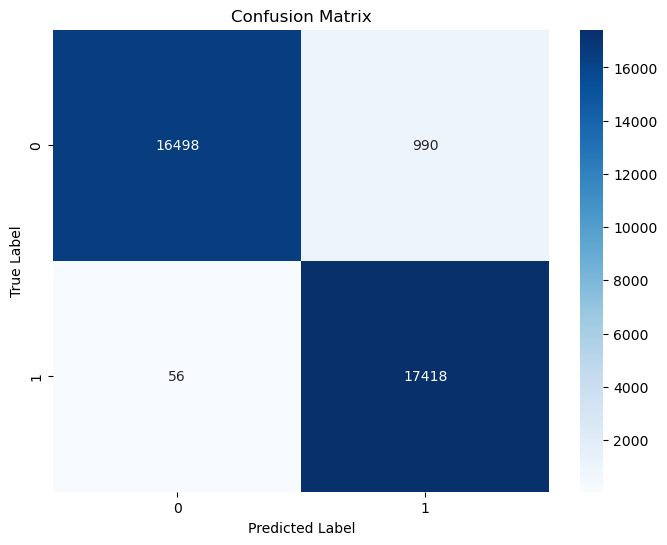

In [20]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek klasifikasi K-Nearest Neighbors
model_KNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model_KNN.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_KNN.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
import pickle
pickle.dump(model_KNN , open('model.pkl', 'wb'))